epoch 0, loss 0.7046273946762085
epoch 200, loss 0.13535892963409424
epoch 400, loss 0.1349671483039856
epoch 600, loss 0.1310213953256607
epoch 800, loss 0.13097333908081055
epoch 1000, loss 0.1309541016817093
epoch 1200, loss 0.13094468414783478
epoch 1400, loss 0.13093943893909454
epoch 1600, loss 0.13093625009059906
epoch 1800, loss 0.13093417882919312


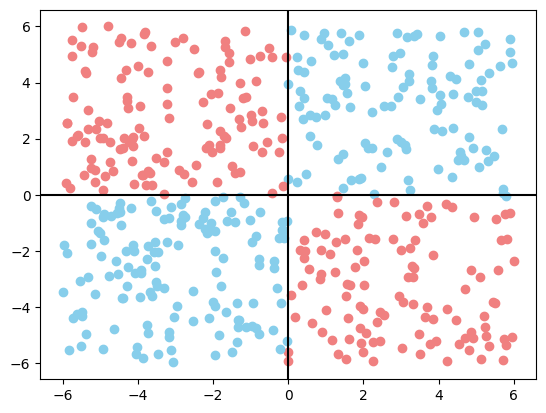

In [11]:
import numpy as np
import math
import random
random.seed(123)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# generate data
x_coord = []
x_class = []
for i in range(500):
    x1 = random.uniform(-6, 6)
    x2 = random.uniform(-6, 6)
    label = 0 if x1 * x2 > 0 else 1
    x_coord.append([x1, x2])
    x_class.append(label)

x_coord = np.asarray(x_coord)
x_class = np.asarray(x_class)

# define model
class ExclusiveOR(nn.Module):
  def __init__(self, Dim_in, Dim_out):
    super(ExclusiveOR, self).__init__()
    self.input = nn.Linear(Dim_in, 32)
    self.hidden1 = nn.Linear(32,16)
    self.hidden2 = nn.Linear(16,8) # two hidden layers
    self.output = nn.Linear(8, Dim_out)
    self.tanh = nn.Tanh()

  def forward(self, x):
        h_relu = F.relu(self.input(x))
        h_relu1 = F.relu(self.hidden1(h_relu))
        h_relu2 = F.relu(self.hidden2(h_relu1))
        pred = self.tanh(self.output(h_relu2))
        return pred


# create model

model = ExclusiveOR(2,2)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.03
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 2000

# train model

for epoch in range(epochs):
    inputs = torch.from_numpy(x_coord).type(torch.FloatTensor)
    labels = torch.from_numpy(x_class)

    optimizer.zero_grad()
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

#Plot
outputs = model.forward(torch.from_numpy(x_coord).type(torch.FloatTensor))
_, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots()
for i in range(x_class.shape[0]):

    if predicted[i] == 0:
      marker = 'o'
      ax.plot(x_coord[i][0], x_coord[i][1], marker, color='skyblue')
    else:
      marker = 'o'
      ax.plot(x_coord[i][0], x_coord[i][1], marker, color='lightcoral')



ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

